# Baseline BigBench

In [76]:
import re
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme()
sns.set_style("whitegrid")

In [77]:
fs = os.listdir("../data/bbench-baseline")

In [78]:
rands = json.load(open("../data/bbench-baseline/" + fs[0], "r"))

In [79]:
for k,v in rands.items():
    rands[k] = v["chance"]

In [80]:
rands

{'abstract_narrative_understanding': 0.5,
 'analytic_entailment': 0.5,
 'arithmetic_1dig_add': 0.16666666666666666,
 'arithmetic_1dig_sub': 0.16666666666666666,
 'arithmetic_2dig_add': 0.16666666666666666,
 'arithmetic_2dig_sub': 0.16666666666666666,
 'causal_judgement': 0.5,
 'implicatures': 0.5,
 'english_proverbs': 0.5,
 'reasoning_about_color_objects_what_color': 0.05555555555555555,
 'reasoning_about_color_objects_neither_color': 0.1111111111111111,
 'reasoning_about_color_objects_yes_no_color': 0.5,
 'temporal_sequences': 0.25}

In [81]:
tasks = rands.keys()

In [82]:
data = []
for n in fs:
    shots = int(re.findall(r"(\d).json", n)[0])
    model_name = re.findall(r"(.*)-(\d).json", n)[0][0]
    perf = json.load(open("../data/bbench-baseline/" + n, "r"))
    for k,v in perf.items():
        perf[k] = v["accuracy"]
    perf["model_name"] = model_name
    perf["shots"] = shots
    data.append(perf)

In [83]:
perf = pd.DataFrame(data)

In [84]:
perf

,abstract_narrative_understanding,analytic_entailment,arithmetic_1dig_add,arithmetic_1dig_sub,arithmetic_2dig_add,arithmetic_2dig_sub,causal_judgement,implicatures,english_proverbs,reasoning_about_color_objects_what_color,reasoning_about_color_objects_neither_color,reasoning_about_color_objects_yes_no_color,temporal_sequences,model_name,shots
0,0.53,0.518519,0.42,0.55,0.046,0.506,0.474860,0.495935,0.529412,0.060,0.125,0.495,0.197,gpt2-xl,1
1,0.54,0.537037,0.29,0.38,0.029,0.076,0.508380,0.504065,0.411765,0.060,0.130,0.495,0.079,gpt2-small,0
2,0.48,0.481481,0.47,0.47,0.075,0.499,0.541899,0.504065,0.470588,0.065,0.145,0.545,0.205,gpt2-xl,5
3,0.50,0.537037,0.30,0.52,0.025,0.467,0.519553,0.475610,0.500000,0.060,0.205,0.480,0.236,gpt2-large,5
4,0.52,0.537037,0.33,0.44,0.021,0.158,0.480447,0.500000,0.617647,0.060,0.120,0.495,0.259,gpt2-large,1
5,0.55,0.500000,1.00,0.94,1.000,0.973,0.525140,0.522358,0.676471,0.200,0.435,0.760,0.276,llama3-8b,3
6,0.56,0.537037,0.01,0.03,0.000,0.000,0.480447,0.508130,0.500000,0.060,0.130,0.495,0.156,gpt2-large,0
7,0.47,0.537037,0.29,0.47,0.139,0.467,0.491620,0.495935,0.558824,0.060,0.170,0.495,0.181,gpt2-medium,3
8,0.44,0.537037,0.18,0.66,0.004,0.277,0.474860,0.500000,0.676471,0.060,0.135,0.495,0.090,gpt2-xl,0
9,0.50,0.555556,0.36,0.55,0.109,0.488,0.508380,0.487805,0.588235,0.060,0.130,0.495,0.218,gpt2-small,5


In [87]:
order = ["gpt2-small", "gpt2-medium", "gpt2-large", "gpt2-xl", "llama3-8b"]

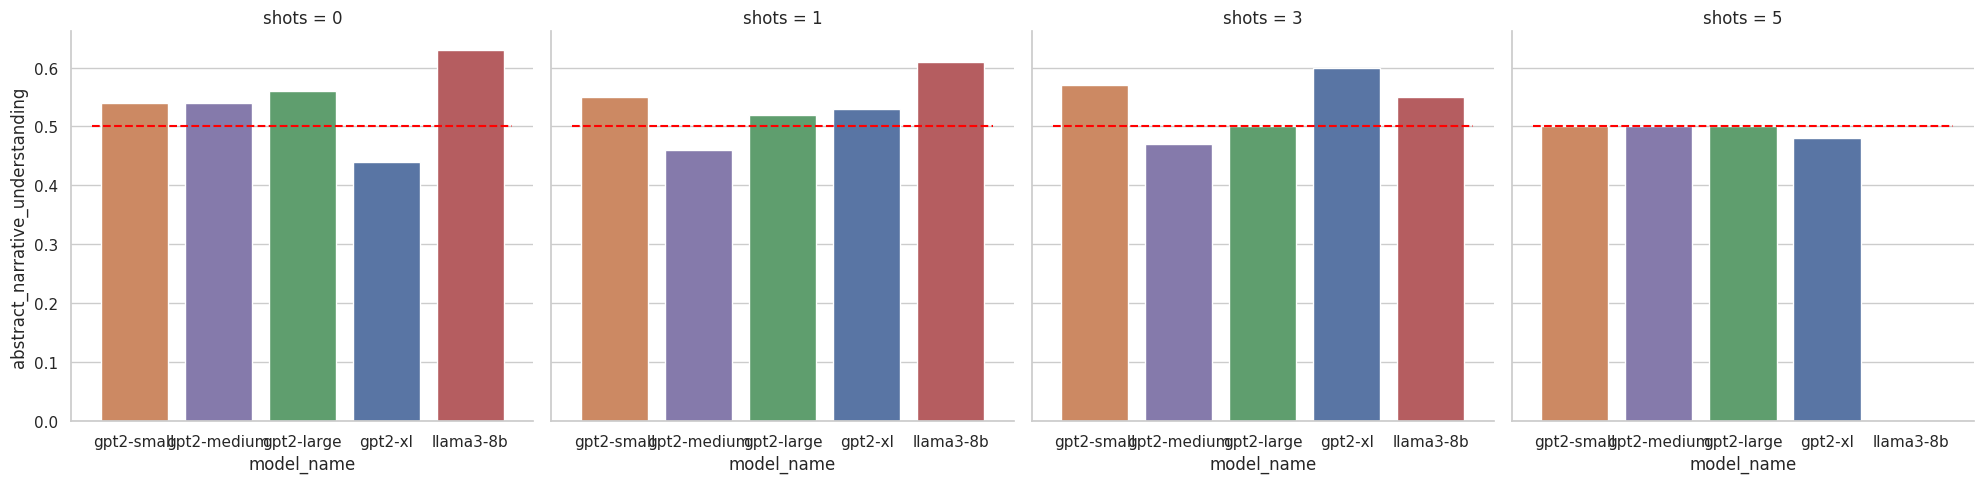

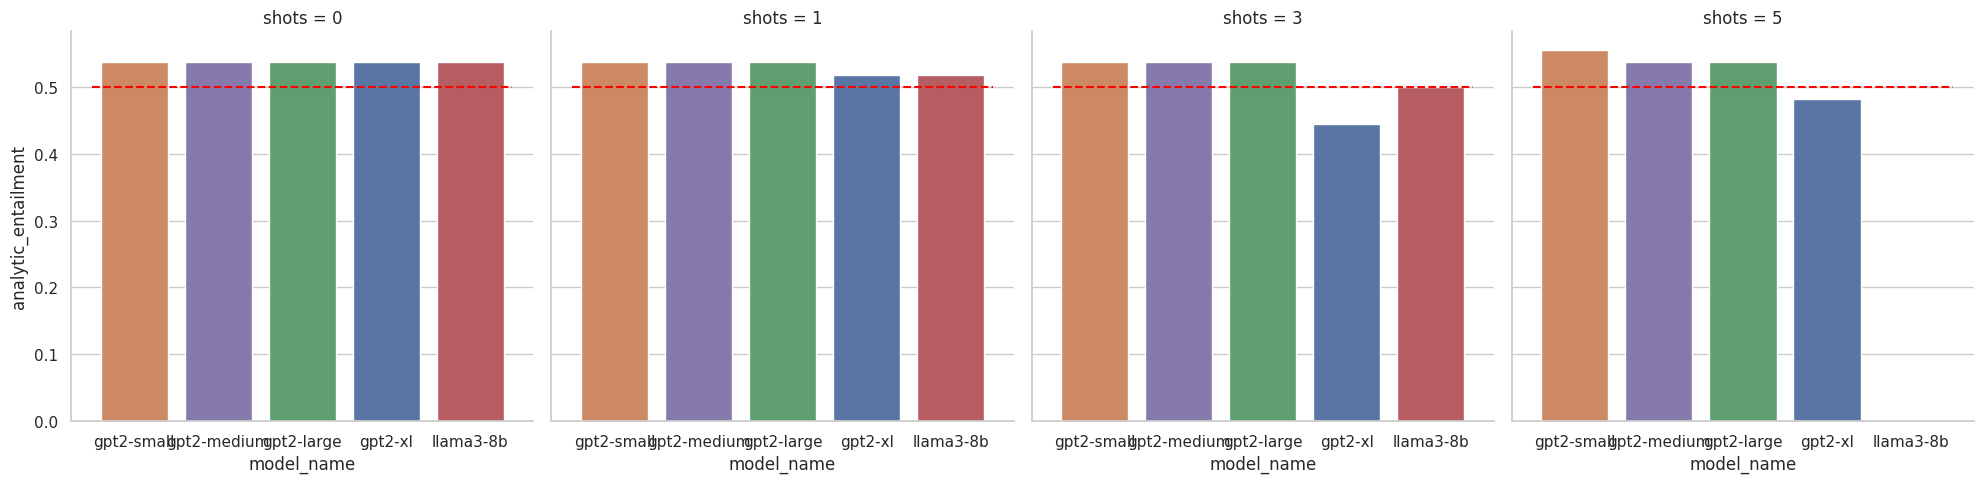

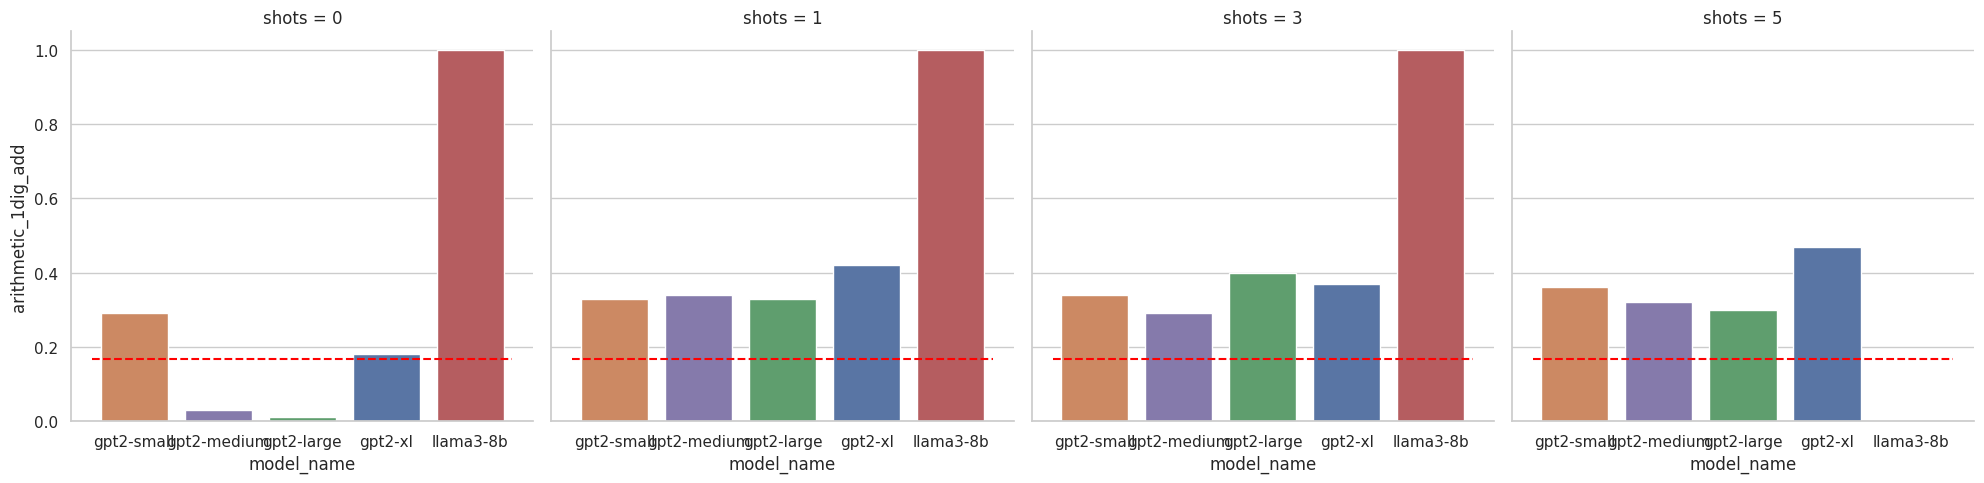

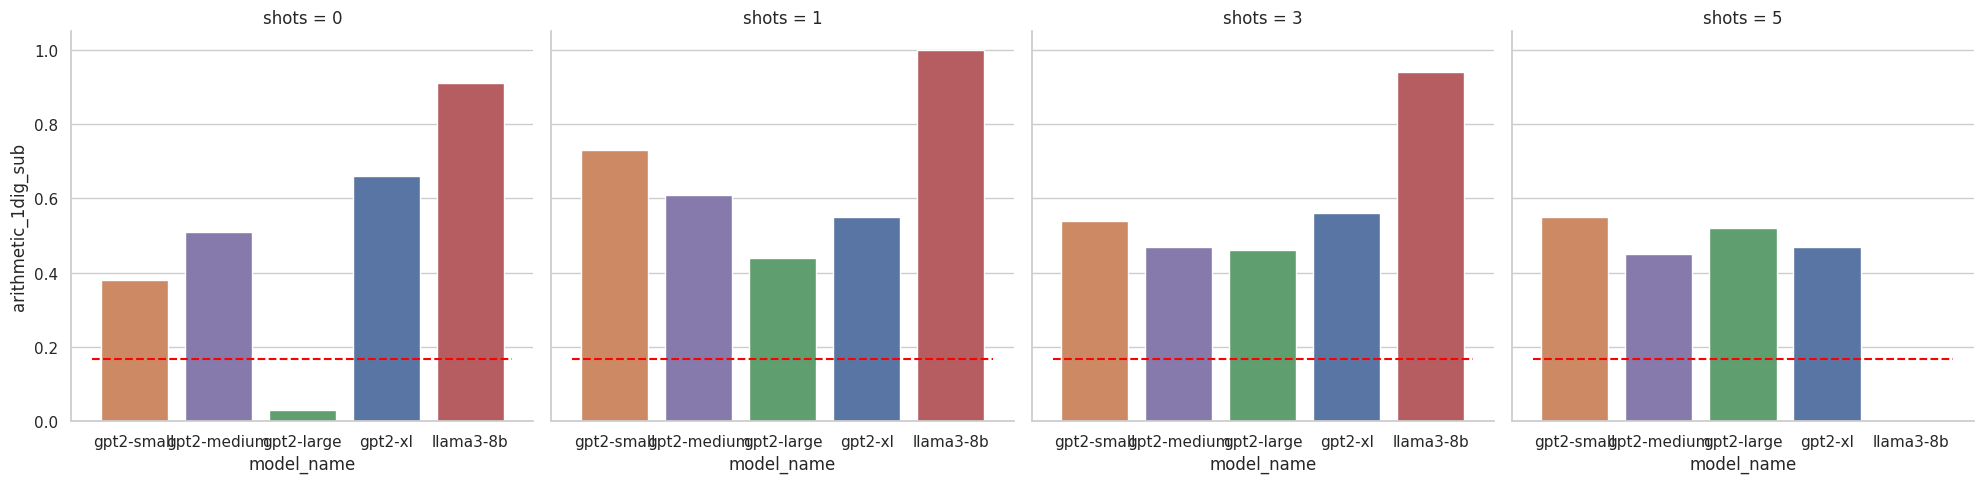

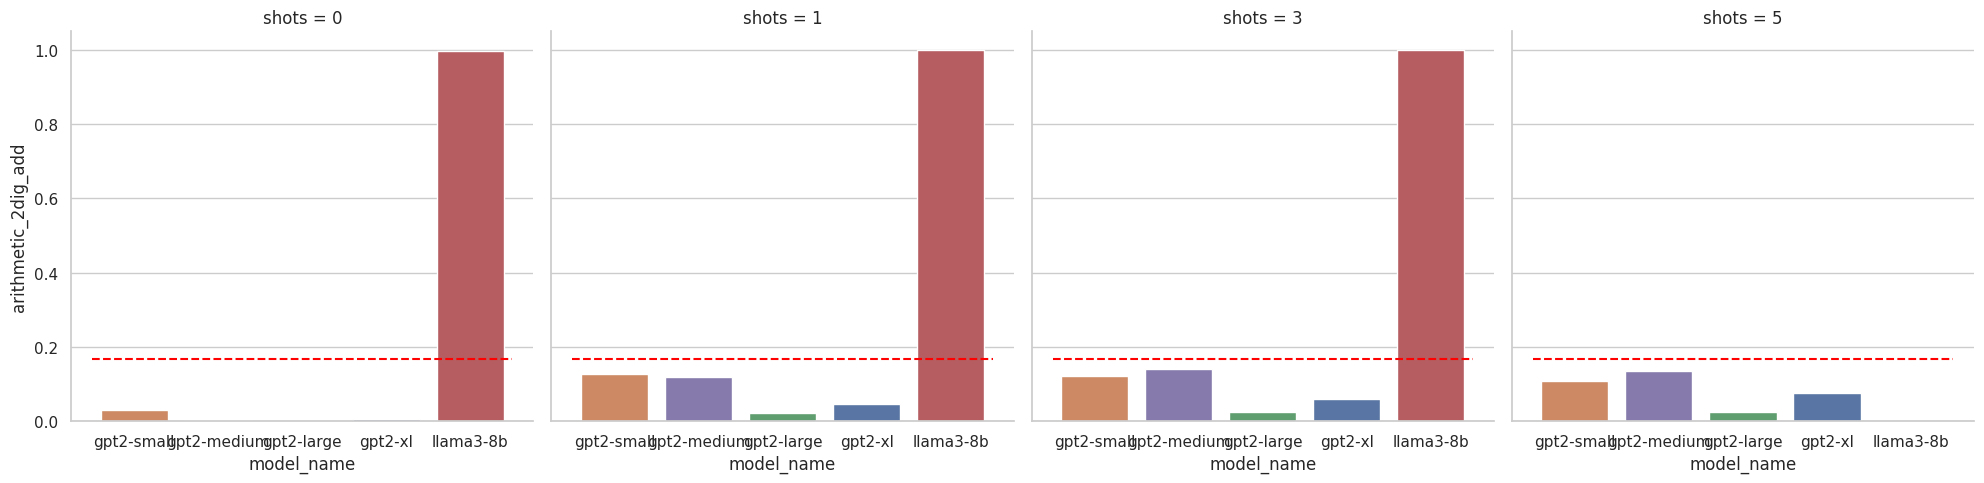

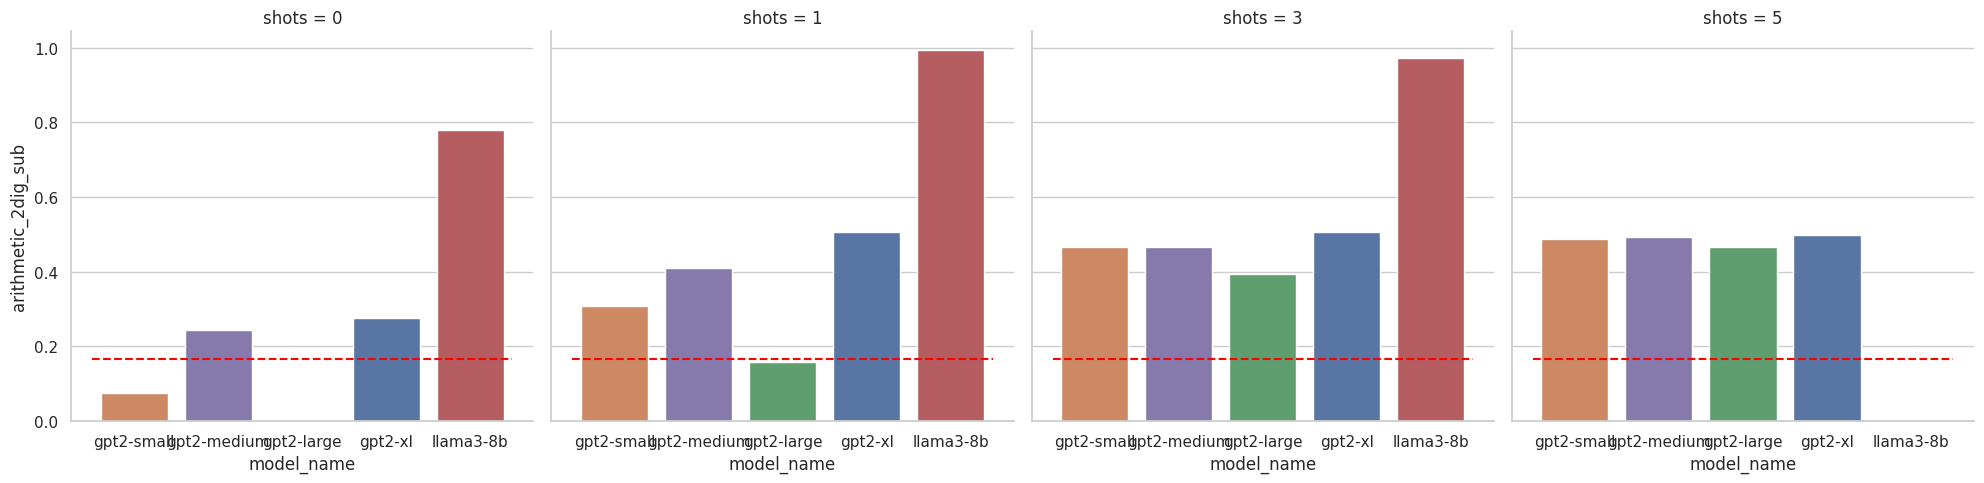

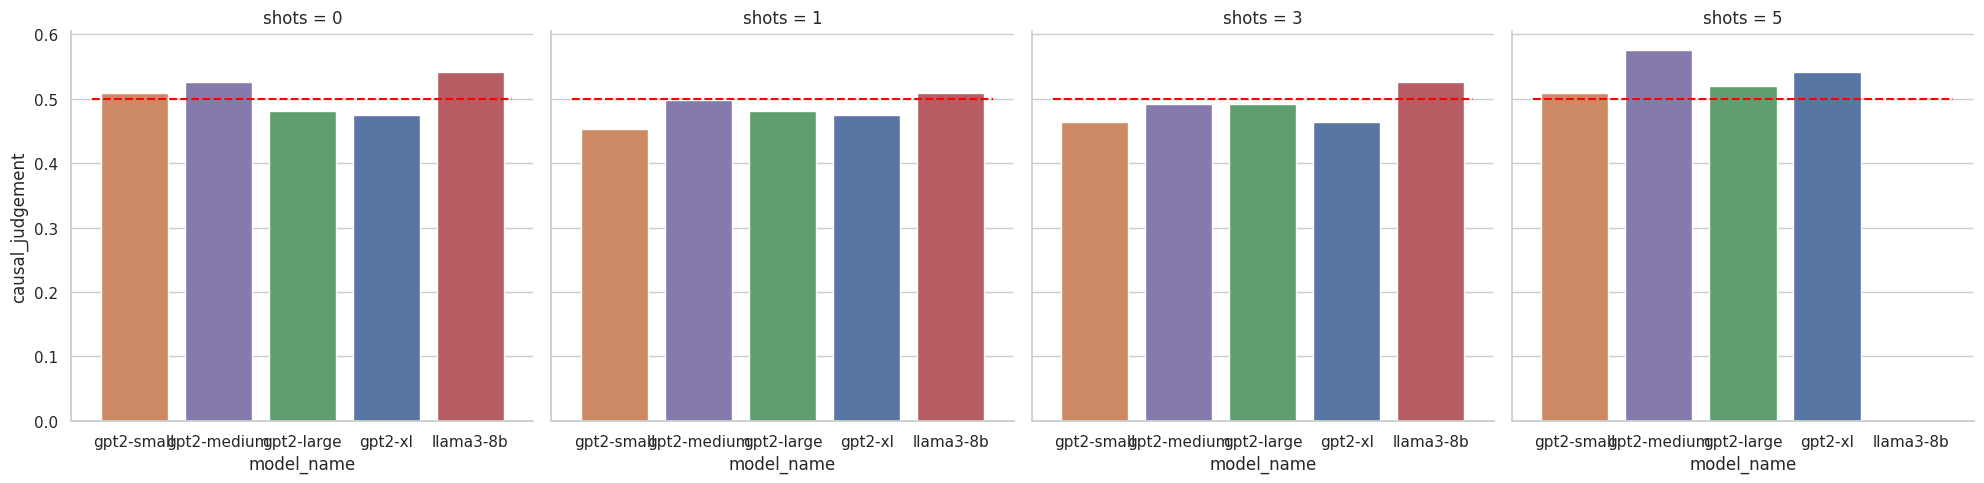

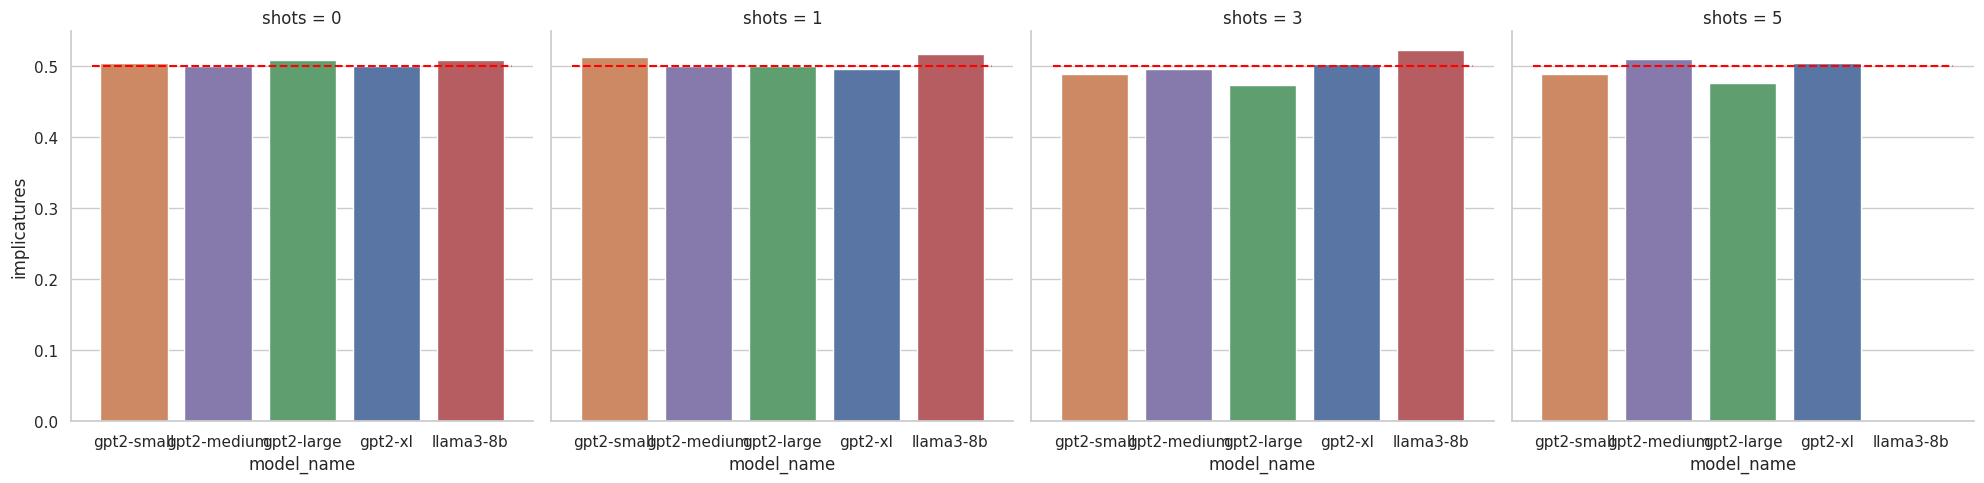

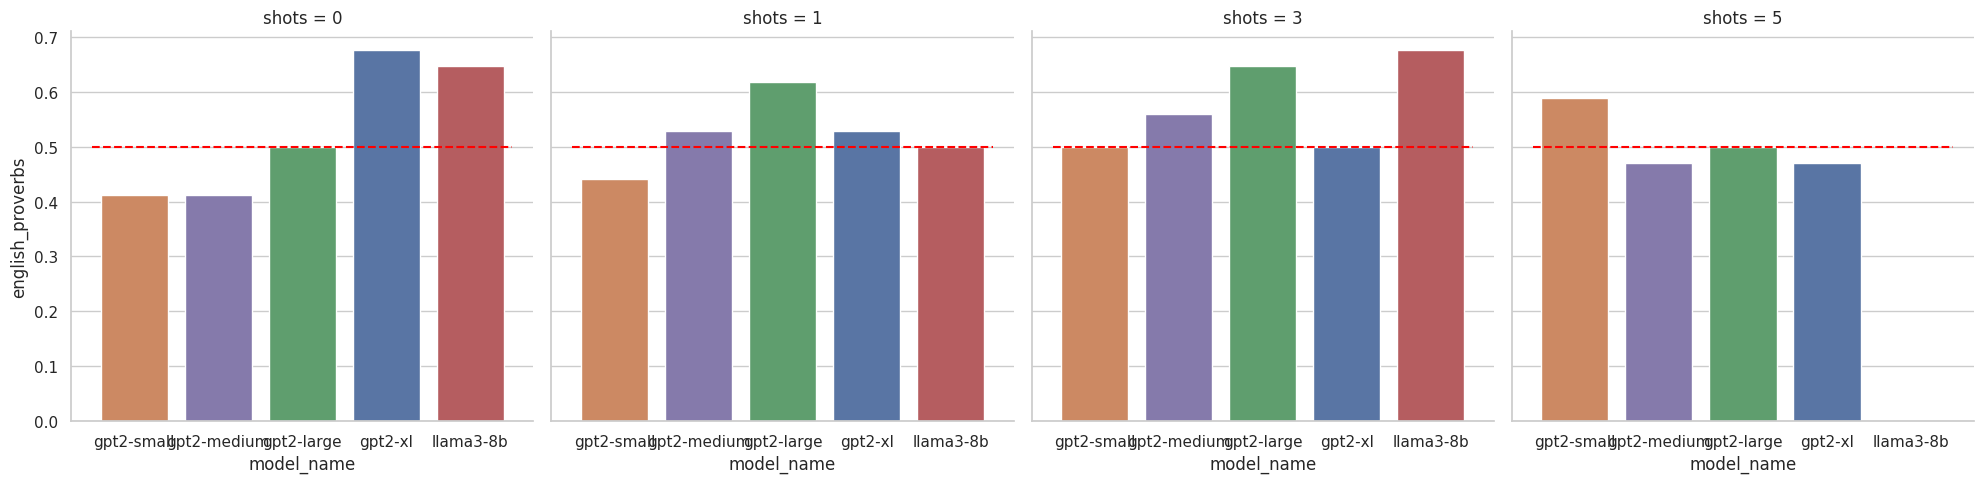

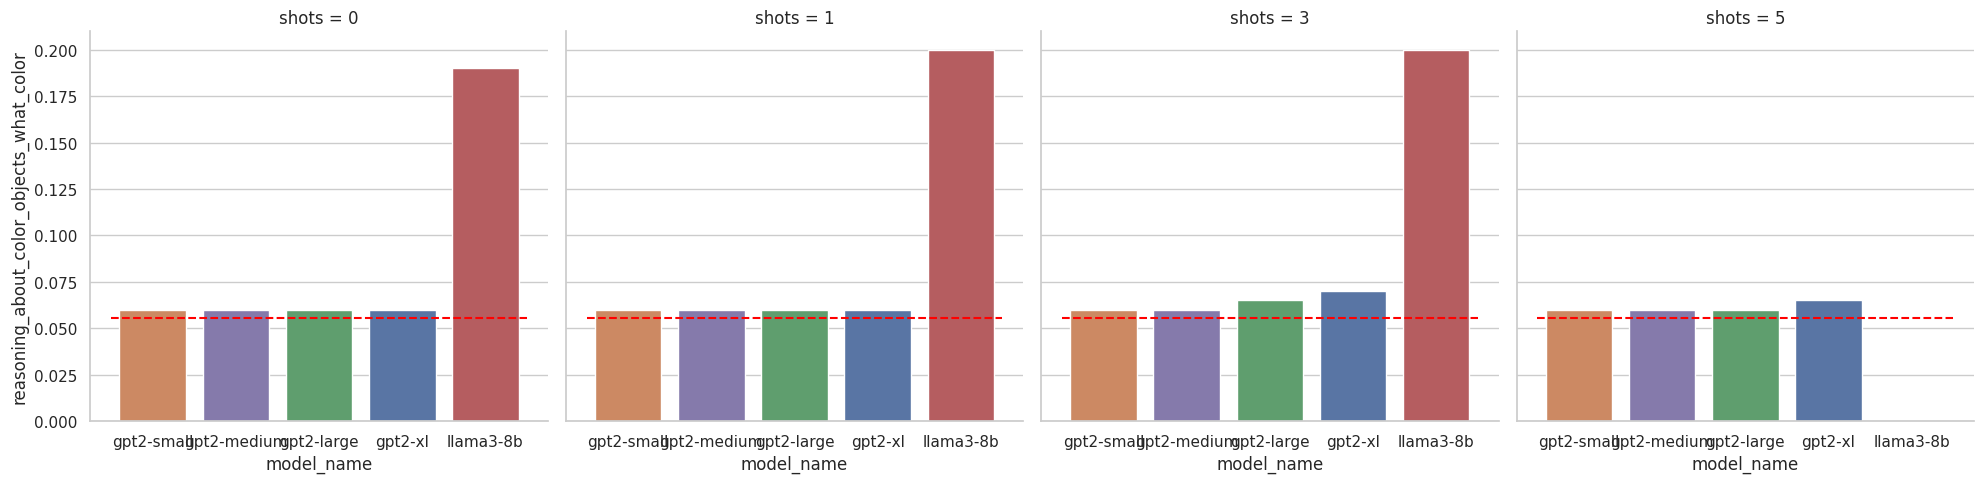

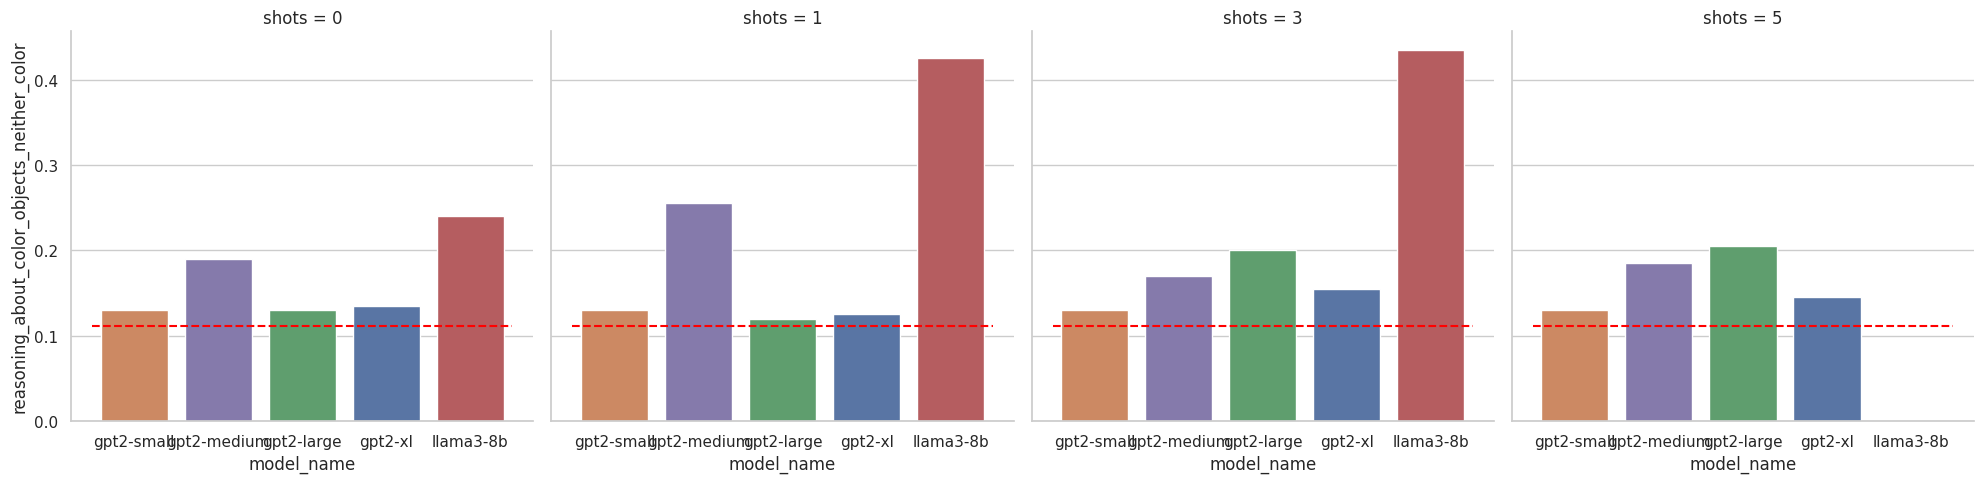

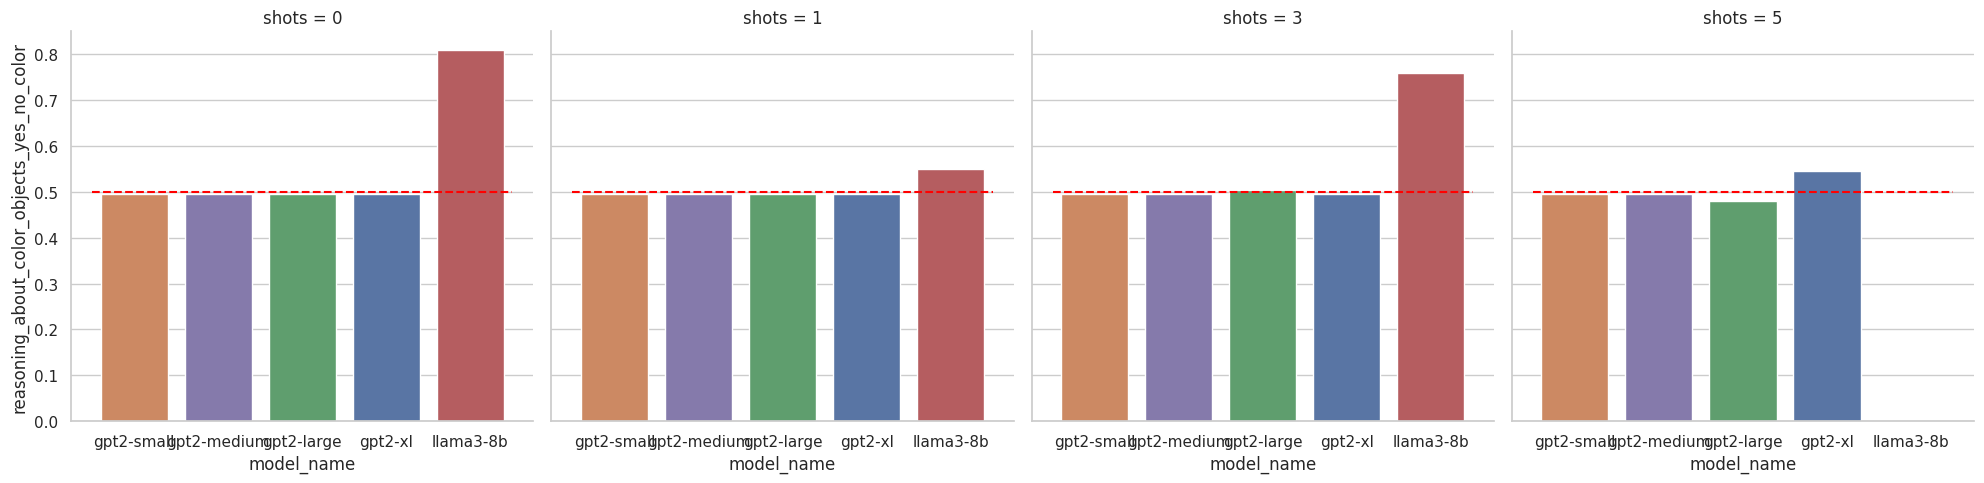

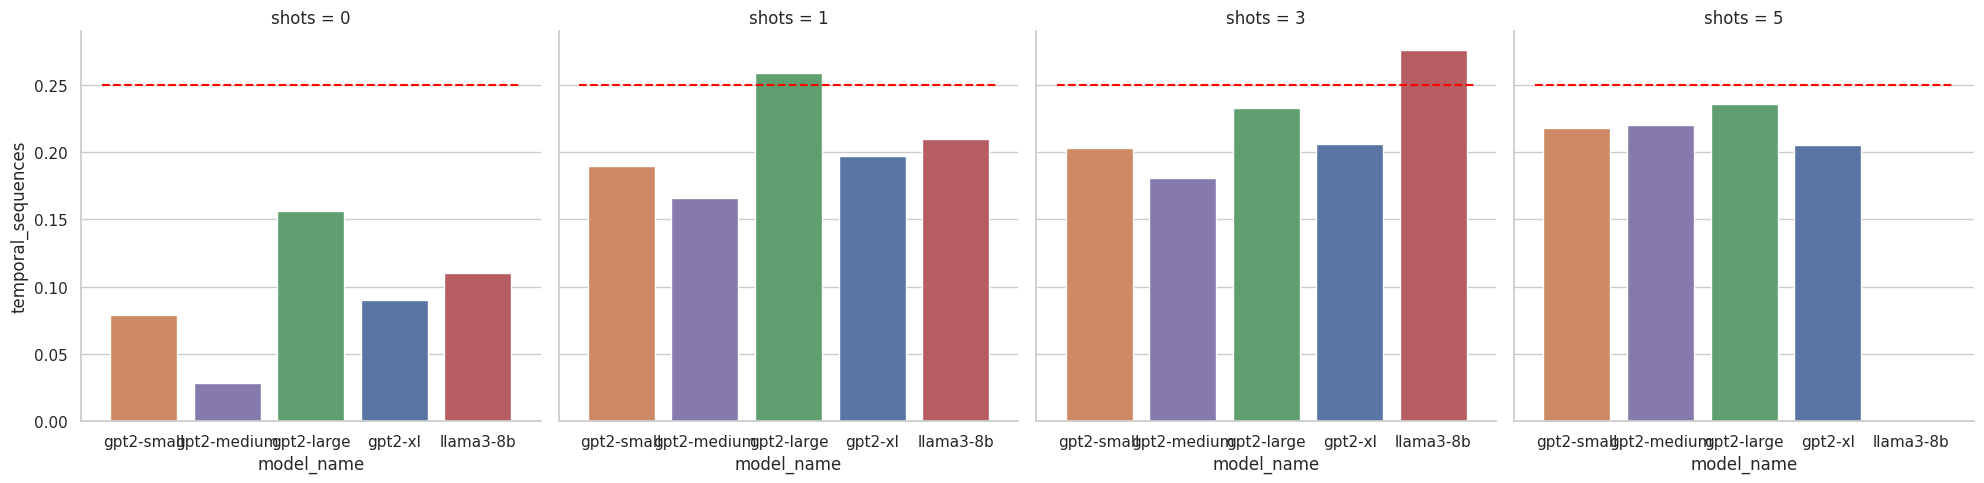

In [89]:
for j, t in enumerate(tasks):
    d = perf[[t, "model_name", "shots"]]
    g = sns.catplot(d, kind="bar", x="model_name", y=t, col="shots", order=order, hue="model_name")
    [g.axes[0,i].hlines(y=rands[t], xmin=-0.5,xmax=4.5, color="red",linestyle='--') for i in range(4)]
plt.show()